In [174]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import seaborn as sns

In [175]:
u_control_dset = xr.open_dataset("/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/Amon/uas/gn/files/d20190410/uas_Amon_UKESM1-0-LL_piControl_r1i1p1f2_gn_205001-214912.nc")
v_control_dset = xr.open_dataset("/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/Amon/vas/gn/files/d20190410/vas_Amon_UKESM1-0-LL_piControl_r1i1p1f2_gn_205001-214912.nc")

In [176]:
u_control_months_20802100 = u_control_dset['uas'].where(u_control_dset['time.year'] > 2080, drop=True).where(u_control_dset['time.year'] <=2100, drop=True).groupby('time.month').mean(dim='time')\
.interp(lon=np.arange(360), kwargs={"fill_value": "extrapolate"}).interp(lat=np.arange(89,-90,-1))
v_control_months_20802100 = v_control_dset['vas'].where(v_control_dset['time.year'] > 2080, drop=True).where(v_control_dset['time.year'] <=2100, drop=True).groupby('time.month').mean(dim='time')\
.interp(lon=np.arange(360), kwargs={"fill_value": "extrapolate"}).interp(lat=np.arange(89,-90,-1))

u_normalised = u_control_months_20802100/np.sqrt(u_control_months_20802100**2 + v_control_months_20802100**2)
v_normalised = v_control_months_20802100/np.sqrt(u_control_months_20802100**2 + v_control_months_20802100**2)

Text(0.5, 1.0, 'Surface wind, September')

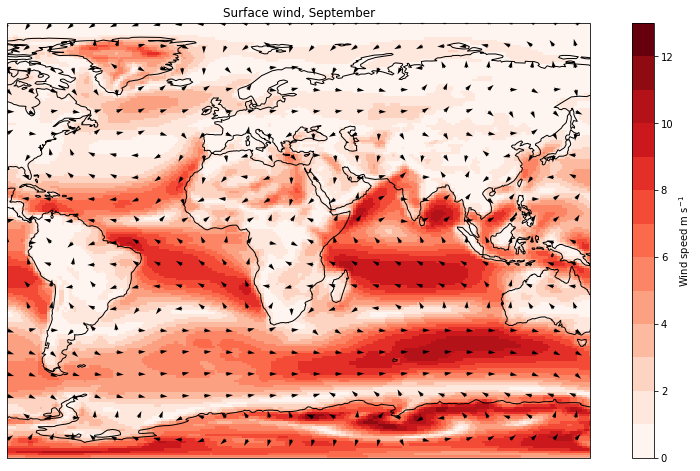

In [177]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
ax.coastlines()
np.sqrt(u_control_months_20802100**2 + v_control_months_20802100**2)[8].plot(ax=ax, cmap=plt.get_cmap("Reds", 13),vmin=0,vmax=13, cbar_kwargs={"label":"Wind speed m s$^{-1}$"})
ax.quiver(np.arange(360)[::9], np.arange(89,-90,-1)[::9], u_normalised[8][::9,::9], v_normalised[8][::9,::9], scale=80)
ax.set_xlim(-90,150)
ax.set_title("Surface wind, September")

Text(0.5, 1.0, 'Surface wind, October')

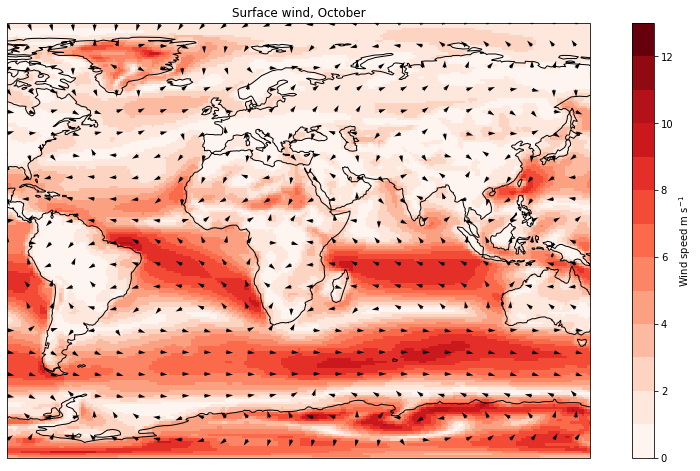

In [178]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
ax.coastlines()
np.sqrt(u_control_months_20802100**2 + v_control_months_20802100**2)[9].plot(ax=ax, cmap=plt.get_cmap("Reds", 13),vmin=0,vmax=13, cbar_kwargs={"label":"Wind speed m s$^{-1}$"}) #august
ax.quiver(np.arange(360)[::9], np.arange(89,-90,-1)[::9], u_normalised[9][::9,::9], v_normalised[9][::9,::9], scale=80)
ax.set_xlim(-90,150)
ax.set_title("Surface wind, October")

Text(0.5, 1.0, 'Surface wind, November')

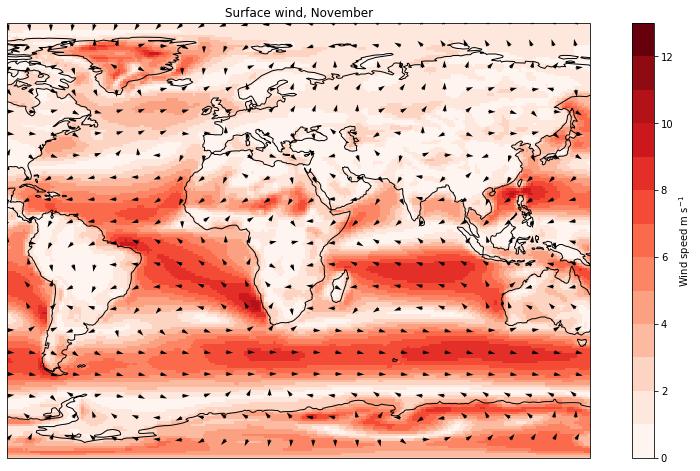

In [179]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
ax.coastlines()
np.sqrt(u_control_months_20802100**2 + v_control_months_20802100**2)[10].plot(ax=ax, cmap=plt.get_cmap("Reds", 13),vmin=0,vmax=13, cbar_kwargs={"label":"Wind speed m s$^{-1}$"}) #august
ax.quiver(np.arange(360)[::9], np.arange(89,-90,-1)[::9], u_normalised[10][::9,::9], v_normalised[10][::9,::9], scale=80)
ax.set_xlim(-90,150)
ax.set_title("Surface wind, November")

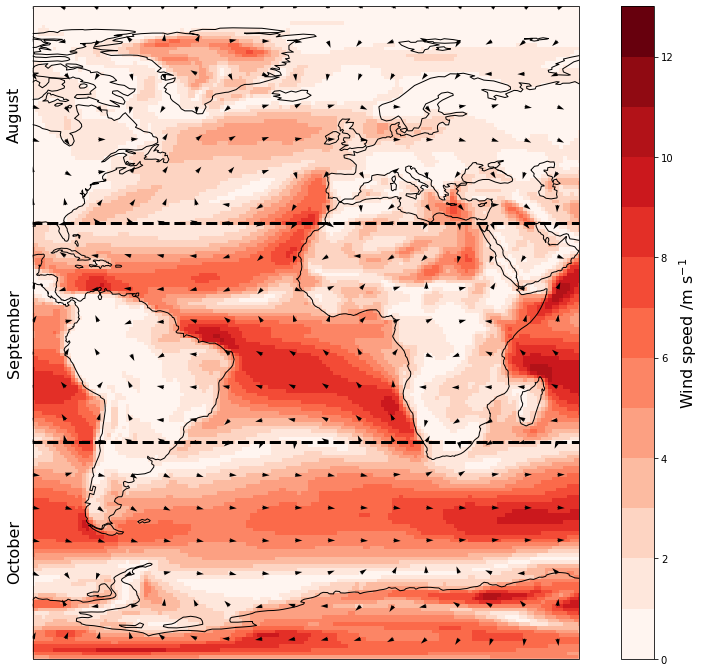

In [219]:
fig = plt.figure(figsize=[15,12])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
ax.coastlines()

uplot = np.sqrt(u_control_months_20802100**2 + v_control_months_20802100**2).where(u_control_months_20802100['lat'] >= 30, drop=True)[7].plot(ax=ax, cmap=plt.get_cmap("Reds", 13),vmin=0,vmax=13, add_colorbar=False) #September
ax.quiver(np.arange(360)[::9], np.arange(89,30,-1)[::9], .4*u_normalised.where(u_normalised['lat'] >= 30, drop=True)[7][::9,::9], .4*v_normalised.where(v_normalised['lat'] >= 30, drop=True)[7][::9,::9], scale=30)

np.sqrt(u_control_months_20802100**2 + v_control_months_20802100**2).where(np.abs(u_control_months_20802100['lat']) < 30, drop=True)[8].plot(ax=ax, cmap=plt.get_cmap("Reds", 13),vmin=0,vmax=13, add_colorbar=False) #October
ax.quiver(np.arange(360)[::9], np.arange(30,-31,-1)[::9], .4*u_normalised.where(np.abs(u_normalised['lat']) <=30, drop=True)[8][::9,::9], .4*v_normalised.where(np.abs(v_normalised['lat']) <= 30, drop=True)[8][::9,::9], scale=30)

np.sqrt(u_control_months_20802100**2 + v_control_months_20802100**2).where(u_control_months_20802100['lat'] <= -30, drop=True)[9].plot(ax=ax, cmap=plt.get_cmap("Reds", 13),vmin=0,vmax=13, add_colorbar=False) #November
ax.quiver(np.arange(360)[::9], np.arange(-30,-90,-1)[::9], .4*u_normalised.where(u_normalised['lat'] <= -30, drop=True)[9][::9,::9], .4*v_normalised.where(v_normalised['lat'] <= -30, drop=True)[9][::9,::9], scale=30)

ax.plot([-180,180],[30,30], "k--", linewidth=3)
ax.plot([-180,180],[-30,-30], "k--", linewidth=3)

ax.text(-97,60, "August", va="center", rotation=90, fontsize=16)
ax.text(-97,0, "September", va="center", rotation=90, fontsize=16)
ax.text(-97,-60, "October", va="center", rotation=90, fontsize=16)

fig.patch.set_facecolor('white')

cbar = fig.colorbar(uplot)
cbar.set_label("Wind speed /m s$^{-1}$", fontsize=16)

ax.set_xlim(-90,60)
ax.set_title("")
fig.savefig("./figures/ukesm_control_southbound.png", dpi=150, bbox_inches="tight")

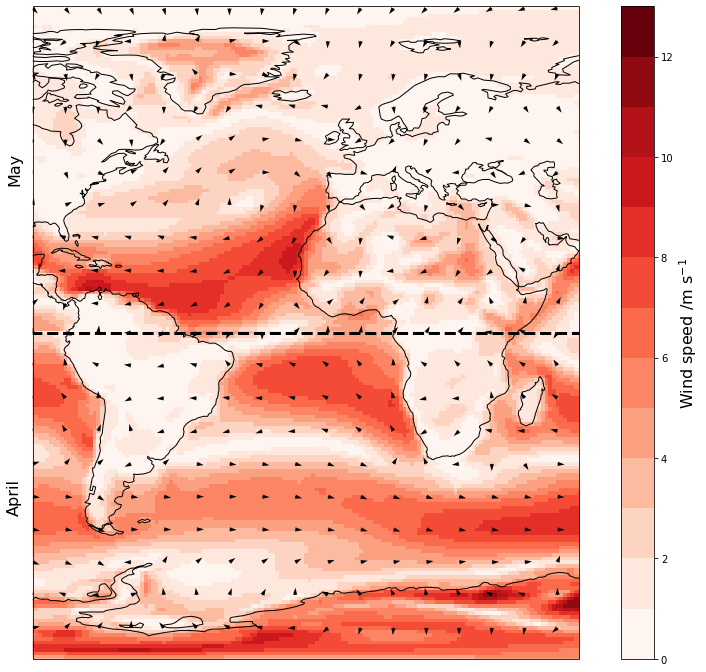

In [218]:
fig = plt.figure(figsize=[15,12])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
ax.coastlines()

uplot = np.sqrt(u_control_months_20802100**2 + v_control_months_20802100**2).where(u_control_months_20802100['lat'] >= 0, drop=True)[4].plot(ax=ax, cmap=plt.get_cmap("Reds", 13),vmin=0,vmax=13, add_colorbar=False) #May
ax.quiver(np.arange(360)[::9], np.arange(89,0,-1)[::9], .4*u_normalised.where(u_normalised['lat'] >= 0, drop=True)[4][::9,::9], .4*v_normalised.where(v_normalised['lat'] >= 0, drop=True)[4][::9,::9], scale=30)

np.sqrt(u_control_months_20802100**2 + v_control_months_20802100**2).where(u_control_months_20802100['lat'] <= 0, drop=True)[3].plot(ax=ax, cmap=plt.get_cmap("Reds", 13),vmin=0,vmax=13, add_colorbar=False) #April
ax.quiver(np.arange(360)[::9], np.arange(-0,-90,-1)[::9], .4*u_normalised.where(u_normalised['lat'] <= 0, drop=True)[3][::9,::9], .4*v_normalised.where(v_normalised['lat'] <= 0, drop=True)[3][::9,::9], scale=30)

ax.plot([-180,180],[0,0], "k--", linewidth=3)

ax.text(-97,45, "May", va="center", rotation=90, fontsize=16)
ax.text(-97,-45, "April", va="center", rotation=90, fontsize=16)

cbar = fig.colorbar(uplot)
cbar.set_label("Wind speed /m s$^{-1}$", fontsize=16)

ax.set_xlim(-90,60)
ax.set_title("")
fig.savefig("./figures/ukesm_control_northbound.png", dpi=150, bbox_inches="tight")

In [182]:
southbound_AF_lat = np.load("./migration_southbound_AF_lat.npy")
southbound_AF_long = np.load("./migration_southbound_AF_long.npy")
southbound_IO_lat = np.load("./migration_southbound_IO_lat.npy")
southbound_IO_long = np.round(np.load("./migration_southbound_IO_long.npy"))
southbound_SA_lat = np.round(np.load("./migration_southbound_SA_lat.npy"))
southbound_SA_long = np.round(np.load("./migration_southbound_SA_long.npy"))

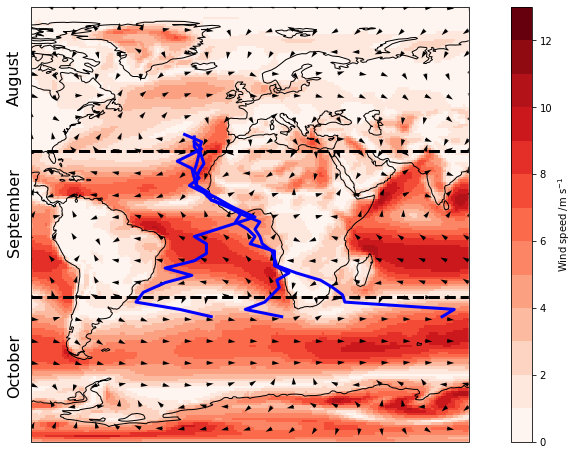

In [183]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))
ax.coastlines()

np.sqrt(u_control_months_20802100**2 + v_control_months_20802100**2).where(u_control_months_20802100['lat'] >= 30, drop=True)[7].plot(ax=ax, cmap=plt.get_cmap("Reds", 13),vmin=0,vmax=13, cbar_kwargs={"label":"Wind speed /m s$^{-1}$"}) #September
ax.quiver(np.arange(360)[::9], np.arange(89,30,-1)[::9], u_normalised.where(u_normalised['lat'] >= 30, drop=True)[7][::9,::9], v_normalised.where(v_normalised['lat'] >= 30, drop=True)[7][::9,::9], scale=60)

np.sqrt(u_control_months_20802100**2 + v_control_months_20802100**2).where(np.abs(u_control_months_20802100['lat']) < 30, drop=True)[8].plot(ax=ax, cmap=plt.get_cmap("Reds", 13),vmin=0,vmax=13, add_colorbar=False) #October
ax.quiver(np.arange(360)[::9], np.arange(30,-31,-1)[::9], u_normalised.where(np.abs(u_normalised['lat']) <=30, drop=True)[8][::9,::9], v_normalised.where(np.abs(v_normalised['lat']) <= 30, drop=True)[8][::9,::9], scale=60)

np.sqrt(u_control_months_20802100**2 + v_control_months_20802100**2).where(u_control_months_20802100['lat'] <= -30, drop=True)[9].plot(ax=ax, cmap=plt.get_cmap("Reds", 13),vmin=0,vmax=13, add_colorbar=False) #November
ax.quiver(np.arange(360)[::9], np.arange(-30,-90,-1)[::9], u_normalised.where(u_normalised['lat'] <= -30, drop=True)[9][::9,::9], v_normalised.where(v_normalised['lat'] <= -30, drop=True)[9][::9,::9], scale=60)

ax.plot([-180,180],[30,30], "k--", linewidth=3)
ax.plot([-180,180],[-30,-30], "k--", linewidth=3)

ax.text(-100,50, "August", rotation=90, fontsize=16)
ax.text(-100,-12, "September", rotation=90, fontsize=16)
ax.text(-100,-70, "October", rotation=90, fontsize=16)

ax.plot(np.round(southbound_SA_long), southbound_SA_lat, "b", linewidth=3)
ax.plot(np.round(southbound_IO_long), southbound_IO_lat, "b", linewidth=3)
ax.plot(np.round(southbound_AF_long), southbound_AF_lat, "b", linewidth=3)

fig.patch.set_facecolor('white')

ax.set_xlim(-90,90)
ax.set_title("")
fig.savefig("./ukesm_control_southbound_withpaths.png", dpi=150, bbox_inches="tight")

In [184]:
def rotate_velocity_field(dx,dy):
    unnormalized_output = dx*u_control_months_20802100 + dy*v_control_months_20802100
    return unnormalized_output/np.sqrt(dx**2 + dy**2)

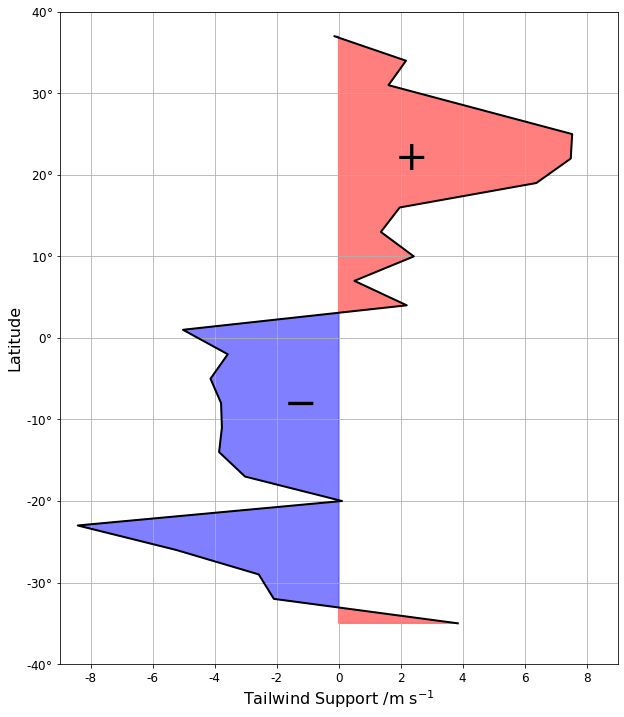

In [217]:
southbound_AF_dx = [111e3*(np.cos(np.pi*southbound_AF_long[i]/180)*southbound_AF_long[i] - np.cos(np.pi*southbound_AF_long[i-1]/180)*southbound_AF_long[i-1]) for i in range(1,len(southbound_AF_long))]
southbound_AF_dy = [111e3*(southbound_AF_lat[i] - southbound_AF_lat[i-1]) for i in range(1,len(southbound_AF_lat))]

tailwind_support_AF_sep = []
longs_support_AF_sep = []
lats_support_AF_sep = []
for i in range(len(southbound_AF_dx)):
    tailwind_field = rotate_velocity_field(southbound_AF_dx[i], southbound_AF_dy[i])[8] #September
    if np.isfinite(southbound_AF_lat[i]):
        if np.isfinite(southbound_AF_long[i]):
            tailwind = tailwind_field.interp(lat = southbound_AF_lat[i]).interp(lon = (southbound_AF_long[i] % 360)).values.squeeze()
            tailwind_support_AF_sep.append(tailwind)
            longs_support_AF_sep.append((southbound_AF_long[i] % 360))
            lats_support_AF_sep.append(southbound_AF_lat[i])

fig = plt.figure(figsize=[10,12])
ax = fig.add_subplot(111)
ax.plot(tailwind_support_AF_sep, lats_support_AF_sep, "k", linewidth=2)
ax.fill_betweenx(lats_support_AF_sep, tailwind_support_AF_sep, where=(np.array(tailwind_support_AF_sep) >= 0), color="red", alpha=0.5, interpolate=True)
ax.fill_betweenx(lats_support_AF_sep, tailwind_support_AF_sep, where=(np.array(tailwind_support_AF_sep) < 0), color="blue", alpha=0.5, interpolate=True)

ax.text(1.8, 22, "$+$", va="center", fontsize=40)
ax.text(-1.8, -8, "$-$", va="center", fontsize=40)
ax.set_xlabel("Tailwind Support /m s$^{-1}$", fontsize=16)
ax.set_ylabel("Latitude", fontsize=16)

ax.set_xlim(-9,9)
ax.set_xticks(np.arange(-8,8+2,2))
ax.set_xticklabels(np.arange(-8,8+2,2), fontsize=12)

ax.set_ylim(-40,40)
ax.set_yticks(np.arange(-40,40+10,10))
ax.set_yticklabels(["{}$\degree$".format(latitude) for latitude in np.arange(-40, 40+10,10)], fontsize=12)

ax.grid()
fig.savefig("./figures/AF_tailwind_latitude.png", bbox_inches="tight", dpi=150)

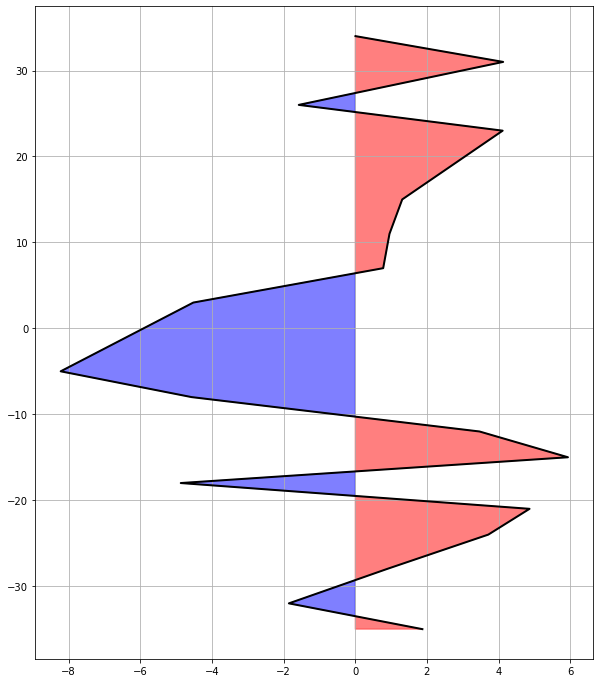

In [199]:
southbound_SA_dx = [111e3*(np.cos(np.pi*southbound_SA_long[i]/180)*southbound_SA_long[i] - np.cos(np.pi*southbound_SA_long[i-1]/180)*southbound_SA_long[i-1]) for i in range(1,len(southbound_SA_long))]
southbound_SA_dy = [111e3*(southbound_SA_lat[i] - southbound_SA_lat[i-1]) for i in range(1,len(southbound_SA_lat))]

tailwind_support_SA_sep = []
longs_support_SA_sep = []
lats_support_SA_sep = []
for i in range(len(southbound_SA_dx)):
    tailwind_field = rotate_velocity_field(southbound_SA_dx[i], southbound_SA_dy[i])[8] #September
    if np.isfinite(southbound_SA_lat[i]):
        if np.isfinite(southbound_SA_long[i]):
            tailwind = tailwind_field.interp(lat = southbound_SA_lat[i]).interp(lon = (southbound_SA_long[i] % 360)).values.squeeze()
            tailwind_support_SA_sep.append(tailwind)
            longs_support_SA_sep.append((southbound_SA_long[i] % 360))
            lats_support_SA_sep.append(southbound_SA_lat[i])

fig = plt.figure(figsize=[10,12])
ax = fig.add_subplot(111)
ax.plot(tailwind_support_SA_sep, lats_support_SA_sep, "k", linewidth=2)
ax.fill_betweenx(lats_support_SA_sep, tailwind_support_SA_sep, where=(np.array(tailwind_support_SA_sep) >= 0), color="red", alpha=0.5, interpolate=True)
ax.fill_betweenx(lats_support_SA_sep, tailwind_support_SA_sep, where=(np.array(tailwind_support_SA_sep) < 0), color="blue", alpha=0.5, interpolate=True)
ax.grid()

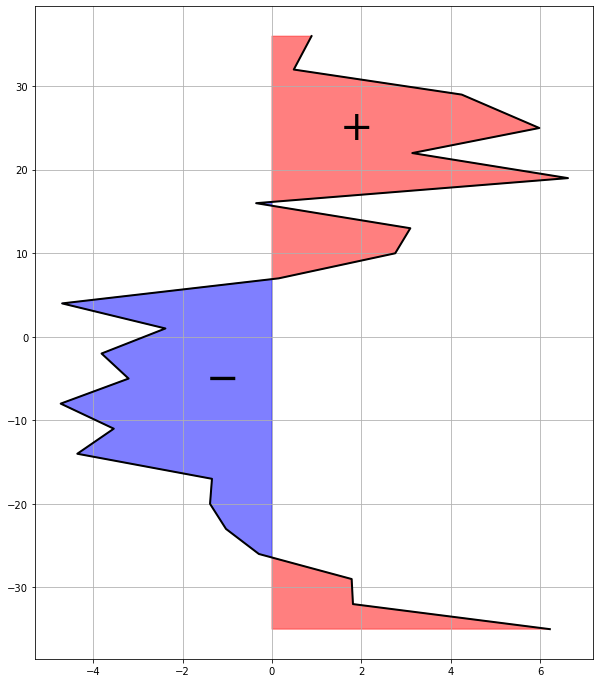

In [206]:
southbound_IO_dx = [111e3*(np.cos(np.pi*southbound_IO_long[i]/180)*southbound_IO_long[i] - np.cos(np.pi*southbound_IO_long[i-1]/180)*southbound_IO_long[i-1]) for i in range(1,len(southbound_IO_long))]
southbound_IO_dy = [111e3*(southbound_IO_lat[i] - southbound_IO_lat[i-1]) for i in range(1,len(southbound_IO_lat))]

tailwind_support_IO_sep = []
longs_support_IO_sep = []
lats_support_IO_sep = []
for i in range(len(southbound_IO_dx)):
    tailwind_field = rotate_velocity_field(southbound_IO_dx[i], southbound_IO_dy[i])[8] #September
    if np.isfinite(southbound_IO_lat[i]):
        if np.isfinite(southbound_IO_long[i]):
            tailwind = tailwind_field.interp(lat = southbound_IO_lat[i]).interp(lon = (southbound_IO_long[i] % 360)).values.squeeze()
            tailwind_support_IO_sep.append(tailwind)
            longs_support_IO_sep.append((southbound_IO_long[i] % 360))
            lats_support_IO_sep.append(southbound_IO_lat[i])

fig = plt.figure(figsize=[10,12])
ax = fig.add_subplot(111)
ax.plot(tailwind_support_IO_sep, lats_support_IO_sep, "k", linewidth=2)
ax.fill_betweenx(lats_support_IO_sep, tailwind_support_IO_sep, where=(np.array(tailwind_support_IO_sep) >= 0), color="red", alpha=0.5, interpolate=True)
ax.fill_betweenx(lats_support_IO_sep, tailwind_support_IO_sep, where=(np.array(tailwind_support_IO_sep) < 0), color="blue", alpha=0.5, interpolate=True)
ax.text(1.5, 25, "$+$", va="center", fontsize=40)
ax.text(-1.5, -5, "$-$", va="center", fontsize=40)
ax.grid()